In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
def plot_quantities(column, path, model):
    df = pd.read_csv(path)
    train = "train "+ column
    test = "test " + column
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))
    tf= [0, 1]
    for ws in tf:
        for aux in tf:
            tdf = df[(df['weight sharing'] == ws) & (df['auxiliary'] == aux) & (df['model'] == model)][["epoch", train , test]]
            tdf = tdf.groupby('epoch')
            mean = tdf.mean()
            std = tdf.std()
            mean = mean.reset_index()
            std = std.reset_index()

            axes[aux, ws].plot(np.arange(1, mean.shape[0]+1) , mean[test].values, 'k-', color = "blue", label =test)
            axes[aux, ws].fill_between(np.arange(1, mean.shape[0]+1),  mean[test].values- std[test].values,  mean[test].values+ std[test].values, color='blue', alpha=0.2)
            
            axes[aux, ws].plot(np.arange(1, mean.shape[0]+1) , mean[train].values, 'k-', color = "red" ,label= train)
            axes[aux, ws].fill_between(np.arange(1, mean.shape[0]+1),  mean[train].values- std[train].values,  mean[train].values+ std[train].values, color='red', alpha=0.2)
            axes[aux, ws].legend()
            title = ("" if ws else "no ") + "weight sharing, " + ("" if aux else "no ") + "auxiliary loss"
            axes[aux, ws].set_title(title)

            
    fig.suptitle("Comparison of {} for different implementations of {}".format(column, model), fontsize=14)
          



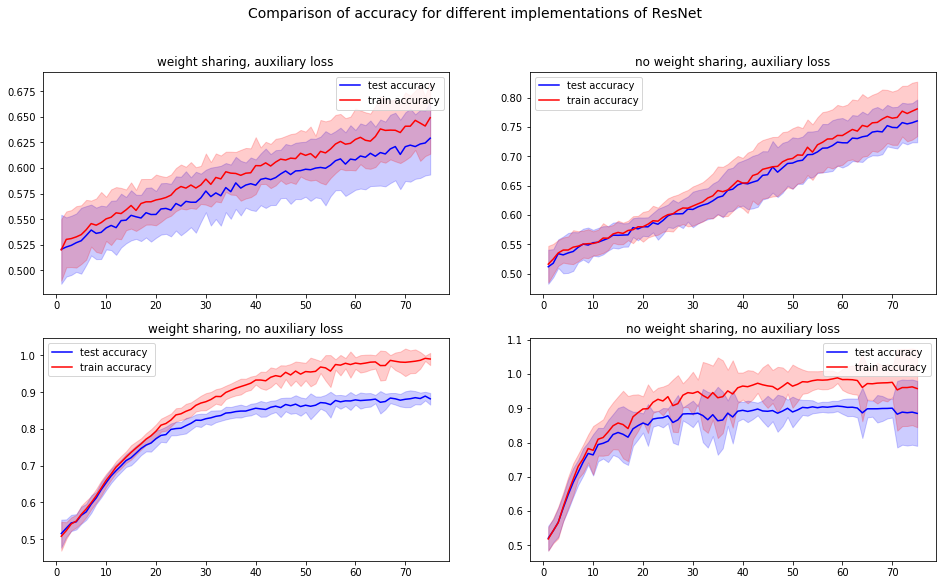

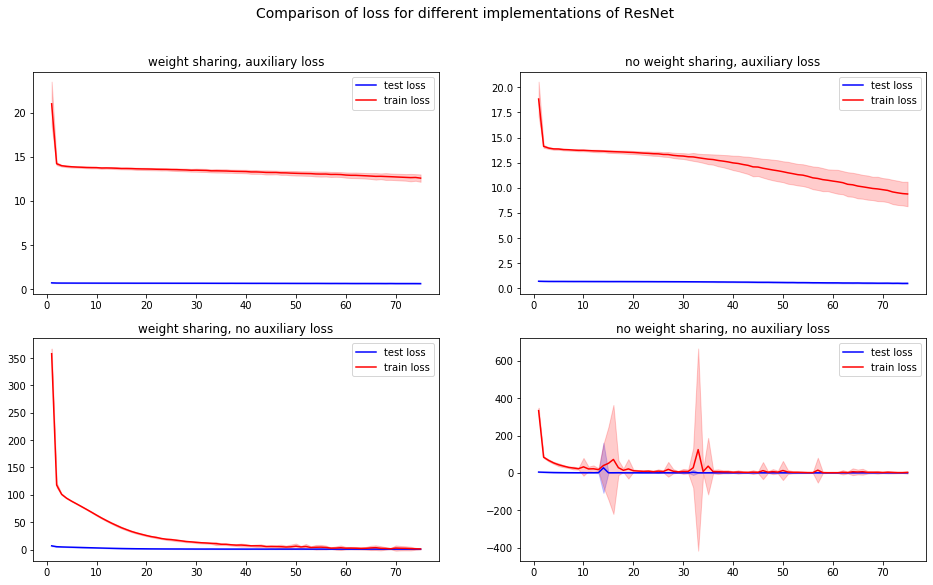

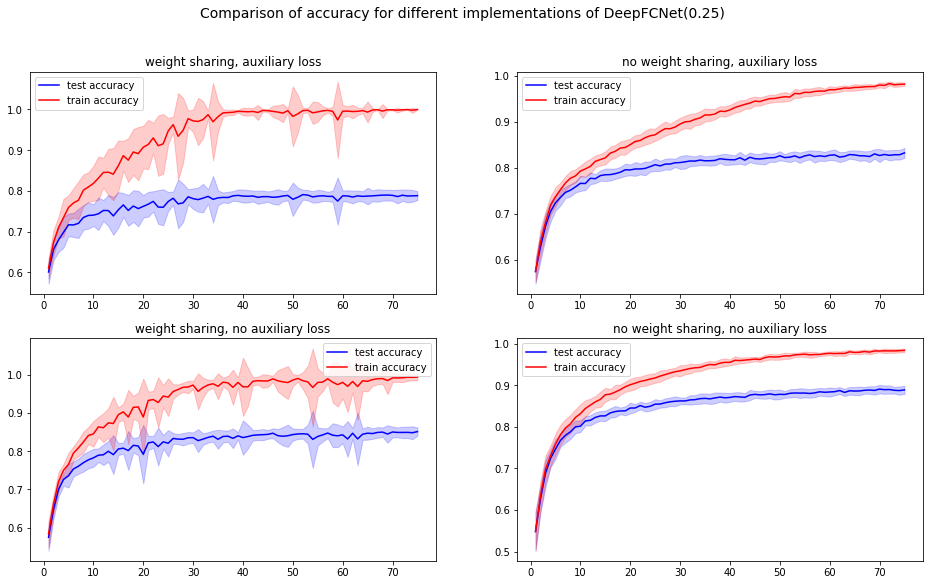

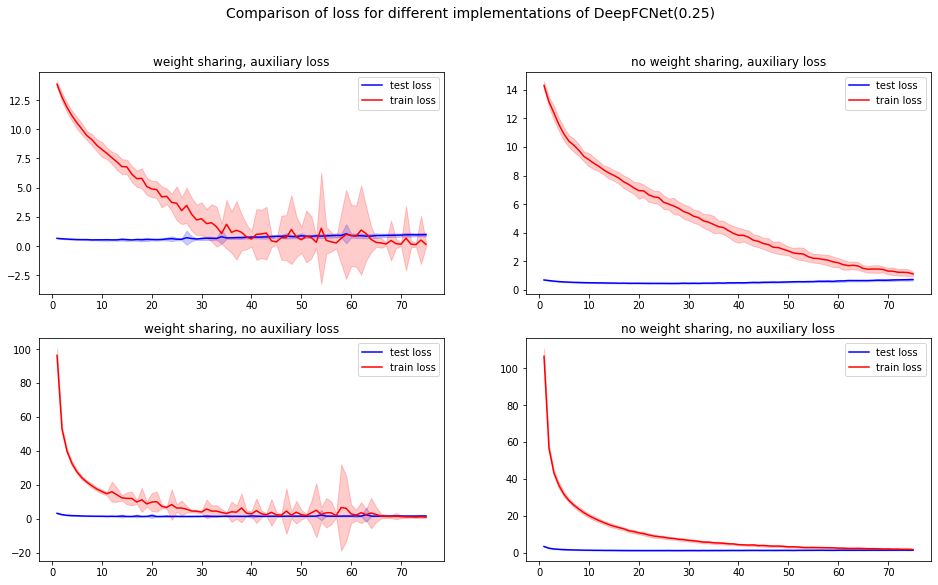

In [229]:
plot_quantities("accuracy", "results.csv", "ResNet")
plot_quantities("loss", "results.csv", "ResNet")
plot_quantities("accuracy", "deepfc_results.csv", "DeepFCNet(0.25)")
plot_quantities("loss", "deepfc_results.csv", "DeepFCNet(0.25)")

In [58]:
df = pd.read_csv("deepfc_results.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).std()
df = df.reset_index()
df = df[(df['epoch'] == 74)]

In [59]:
df

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
296,74,False,DeepFCNet,False,551.985054,0.000627,0.235226,0.010730,0.146250
297,74,False,DeepFCNet,True,551.985054,0.008592,0.449128,0.010932,0.170707
298,74,True,DeepFCNet,False,551.985054,0.003653,0.151704,0.010847,0.059208
299,74,True,DeepFCNet,True,551.985054,0.004419,0.259016,0.009676,0.117594


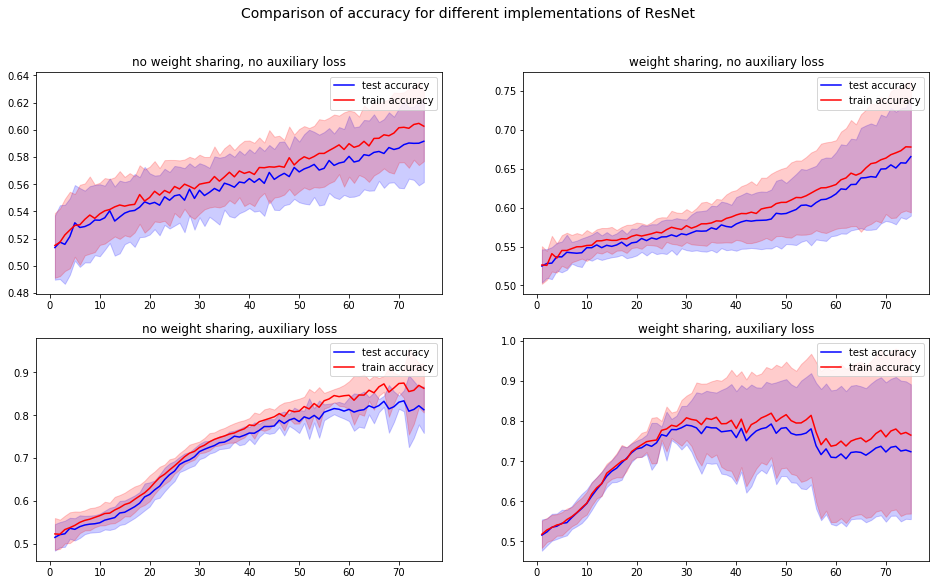

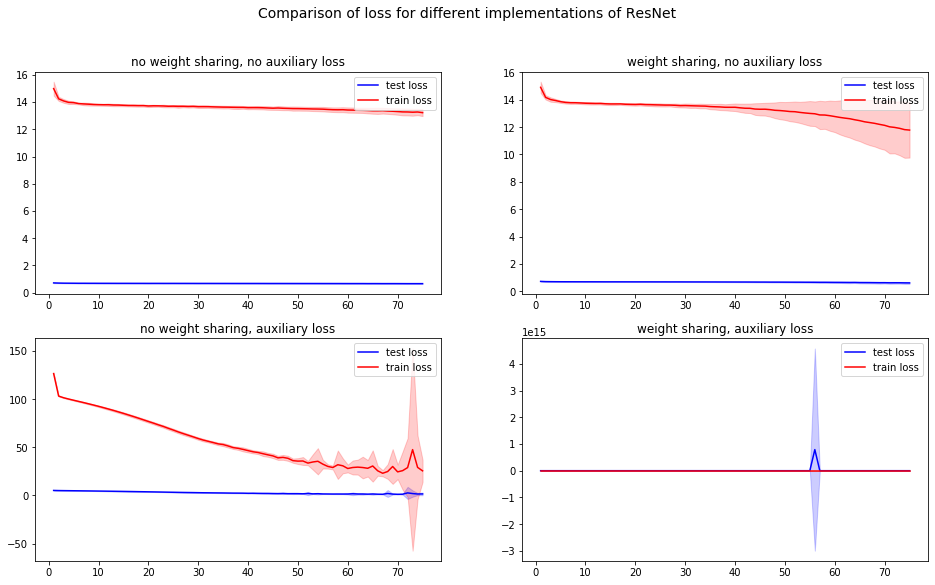

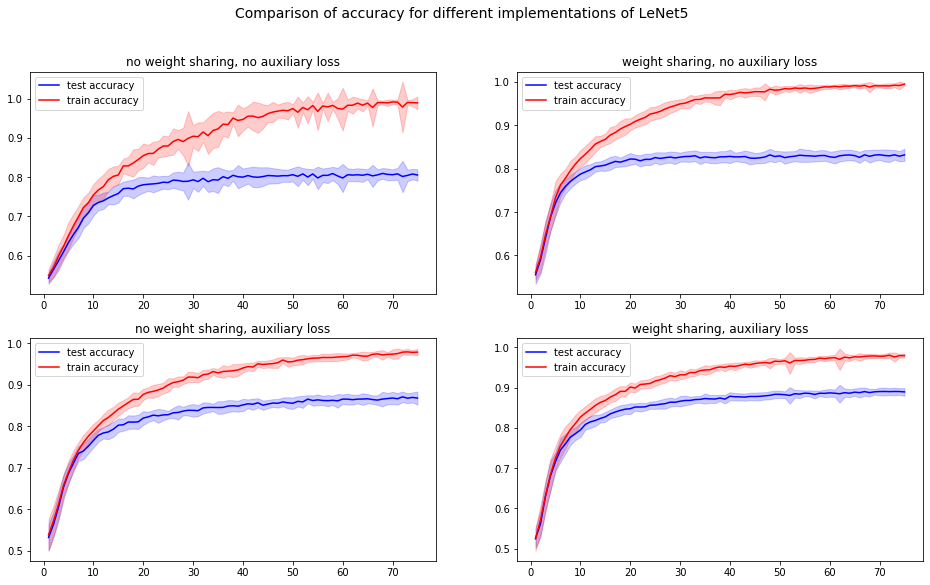

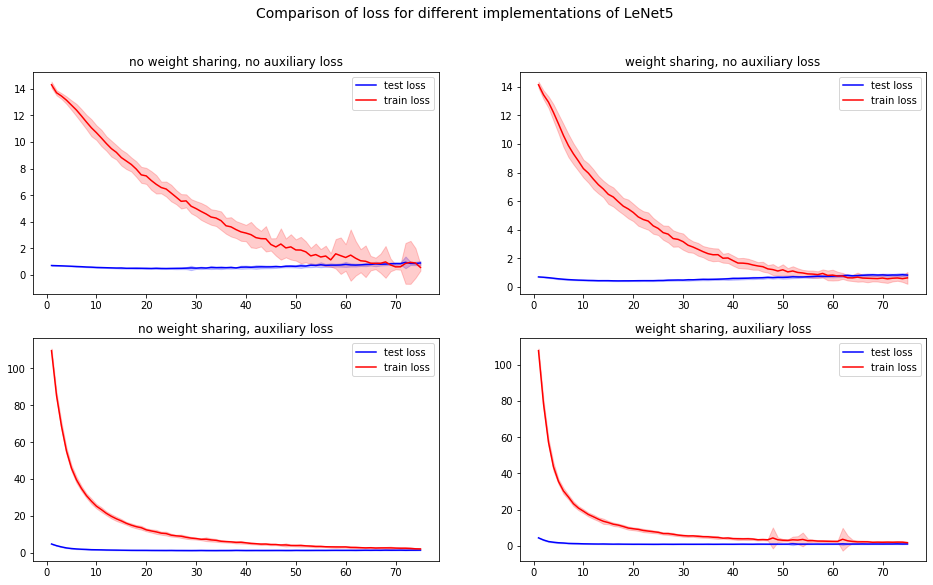

In [233]:
plot_quantities("accuracy", "results1.csv", "ResNet")
plot_quantities("loss", "results1.csv", "ResNet")
plot_quantities("accuracy", "results1.csv", "LeNet5")
plot_quantities("loss", "results1.csv", "LeNet5")

In [237]:
df = pd.read_csv("results1.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).mean()
df = df.reset_index()
df = df[(df['epoch'] == 74)]

In [240]:
df[df['model'] == "LeNet5"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
592,74,False,LeNet5,False,6599,0.98952,0.550547,0.80548,0.884968
593,74,False,LeNet5,True,4724,0.97864,2.043768,0.86788,1.388819
596,74,True,LeNet5,False,2849,0.99500,0.618987,0.83184,0.812605
597,74,True,LeNet5,True,974,0.97976,1.810725,0.88968,1.090286


In [241]:
df[df['model'] == "ResNet"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
594,74,False,ResNet,False,14099,0.60264,13.219690,0.59156,0.667175
595,74,False,ResNet,True,12224,0.86292,25.564092,0.81284,1.618139
598,74,True,ResNet,False,10349,0.67796,11.782261,0.66556,0.607418
599,74,True,ResNet,True,8474,0.76480,37.216900,0.72344,2.211398


In [246]:
df = pd.read_csv("results2.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).mean()
df = df.reset_index()
df = df[(df['epoch'] == 74)]
df

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
296,74,False,ResNet,False,6599,0.76044,9.998624,0.72104,0.550090
297,74,False,ResNet,True,4724,0.97000,2.922613,0.86188,1.200616
298,74,True,ResNet,False,2849,0.89312,5.473348,0.80716,0.473159
299,74,True,ResNet,True,974,0.95936,7.577112,0.87492,0.957298


In [247]:
df = pd.read_csv("results2b.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).mean()
df = df.reset_index()
df = df[(df['epoch'] == 74)]
df

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
296,74,False,ResNet,False,14099,0.58292,13.457639,0.56872,0.679674
297,74,False,ResNet,True,12224,0.86792,26.916959,0.82052,1.598252
298,74,True,ResNet,False,10349,0.61336,13.103567,0.59684,0.662505
299,74,True,ResNet,True,8474,0.83368,53.740310,0.78968,3.094636


In [53]:
df = pd.read_csv("results3.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).std()
df = df.reset_index()
df = df[(df['epoch'] == 74)]


In [54]:
df[df['model'] == "LeNet5"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
892,74,False,LeNet5,False,551.985054,0.000200,0.008603,0.017196,0.129588
893,74,False,LeNet5,True,551.985054,0.005259,0.535903,0.008463,0.188080
898,74,True,LeNet5,False,551.985054,0.001021,0.429799,0.012910,0.140221
899,74,True,LeNet5,True,551.985054,0.112869,26.665873,0.089127,0.976325


In [55]:
df[df['model'] == "LeNet4(0.25)"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
890,74,False,LeNet4(0.25),False,551.985054,0.009678,1.586341,0.015653,0.169624
891,74,False,LeNet4(0.25),True,551.985054,0.029307,9.860487,0.023632,0.127618
896,74,True,LeNet4(0.25),False,551.985054,0.004430,0.176477,0.016505,0.115579
897,74,True,LeNet4(0.25),True,551.985054,0.009829,0.930666,0.013639,0.276002


In [254]:
df[df['model'] == "LeNet4"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
888,74,False,LeNet4,False,14099,0.99904,0.155172,0.81920,0.923064
889,74,False,LeNet4,True,12224,0.99352,0.516250,0.85840,1.492171
894,74,True,LeNet4,False,10349,1.00000,0.028259,0.82484,1.191018
895,74,True,LeNet4,True,8474,0.97220,4.070940,0.84640,1.712942


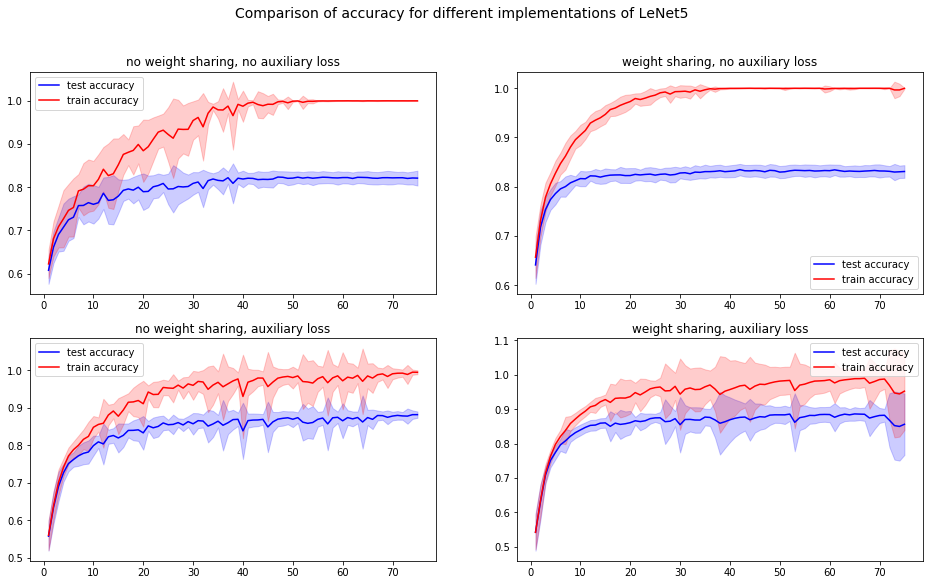

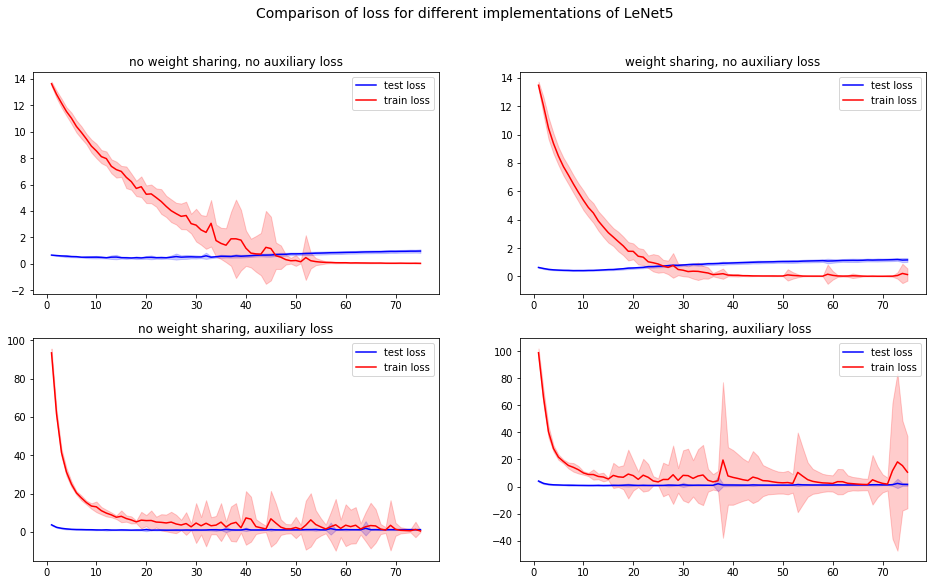

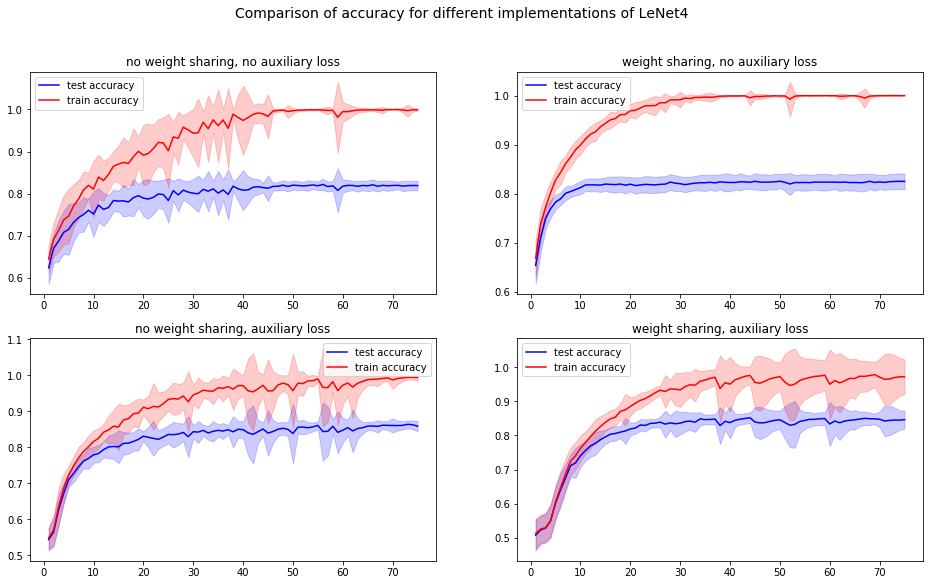

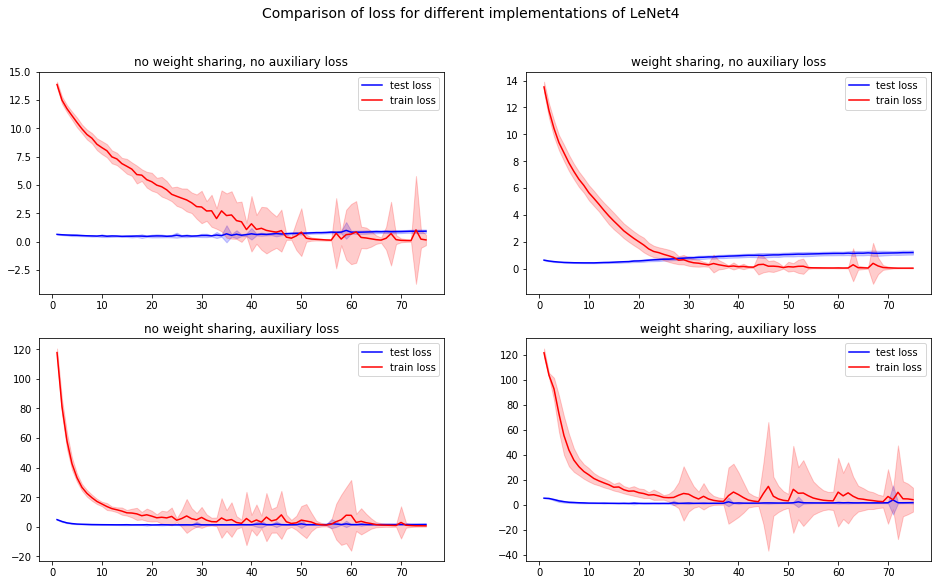

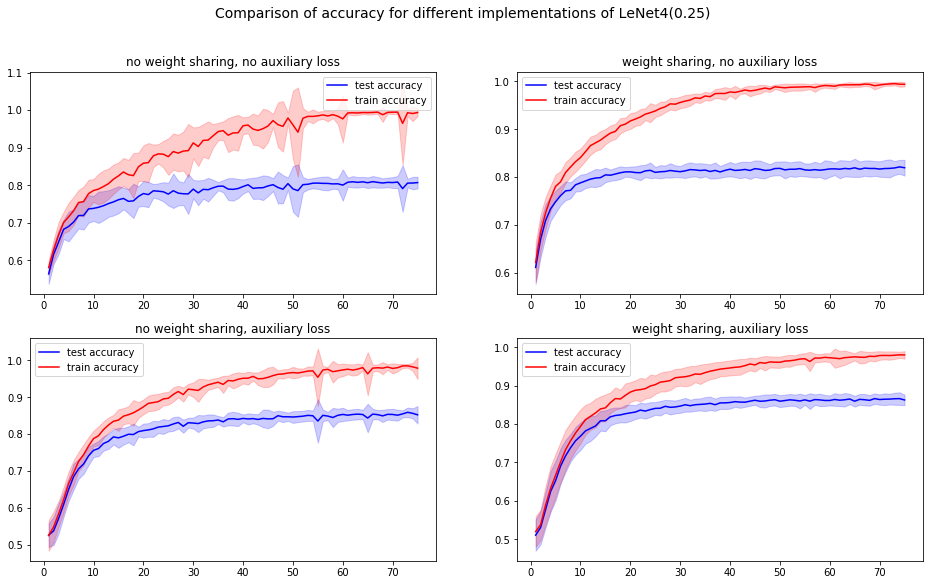

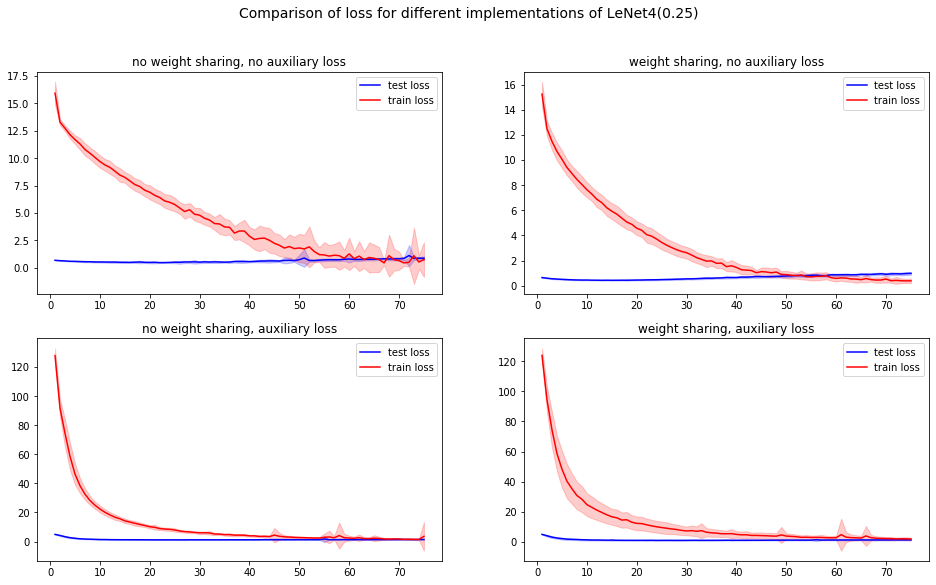

In [255]:
# plot_quantities("accuracy", "results2.csv", "ResNet")
# plot_quantities("loss", "results2.csv", "ResNet")
# plot_quantities("accuracy", "results2b.csv", "ResNet")
# plot_quantities("loss", "results2b.csv", "ResNet")
plot_quantities("accuracy", "results3.csv", "LeNet5")
plot_quantities("loss", "results3.csv", "LeNet5")
plot_quantities("accuracy", "results3.csv", "LeNet4")
plot_quantities("loss", "results3.csv", "LeNet4")
plot_quantities("accuracy", "results3.csv", "LeNet4(0.25)")
plot_quantities("loss", "results3.csv", "LeNet4(0.25)")

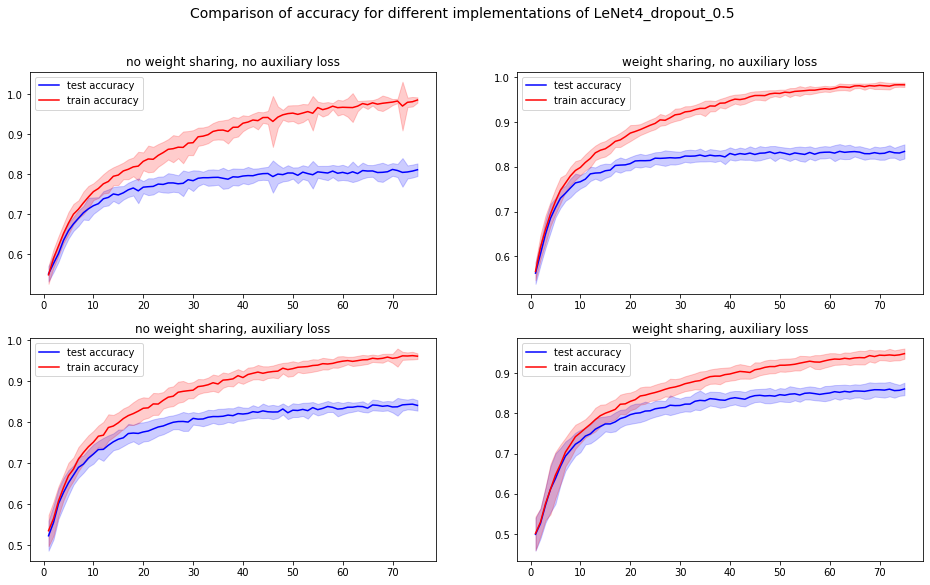

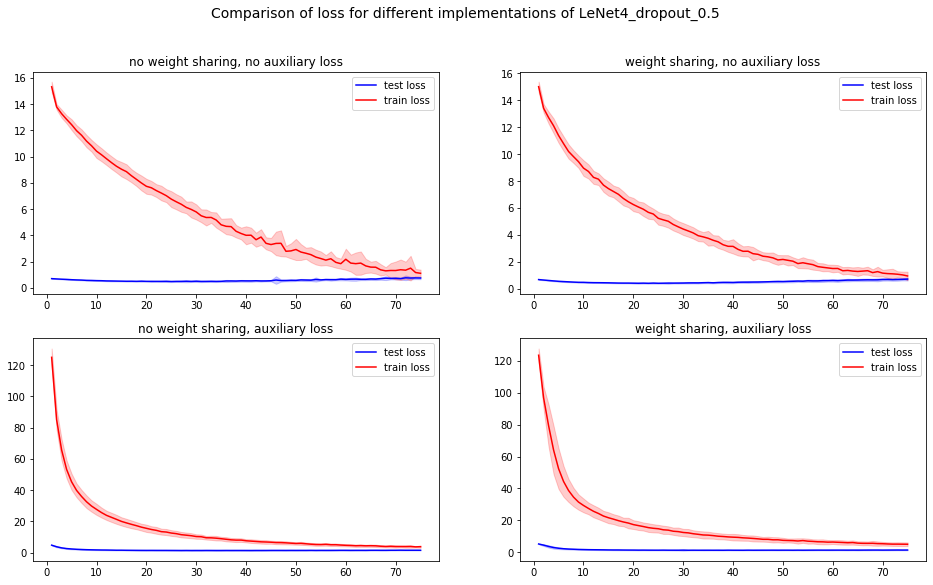

In [258]:
plot_quantities("accuracy", "results4.csv", "LeNet4_dropout_0.5")
plot_quantities("loss", "results4.csv","LeNet4_dropout_0.5")

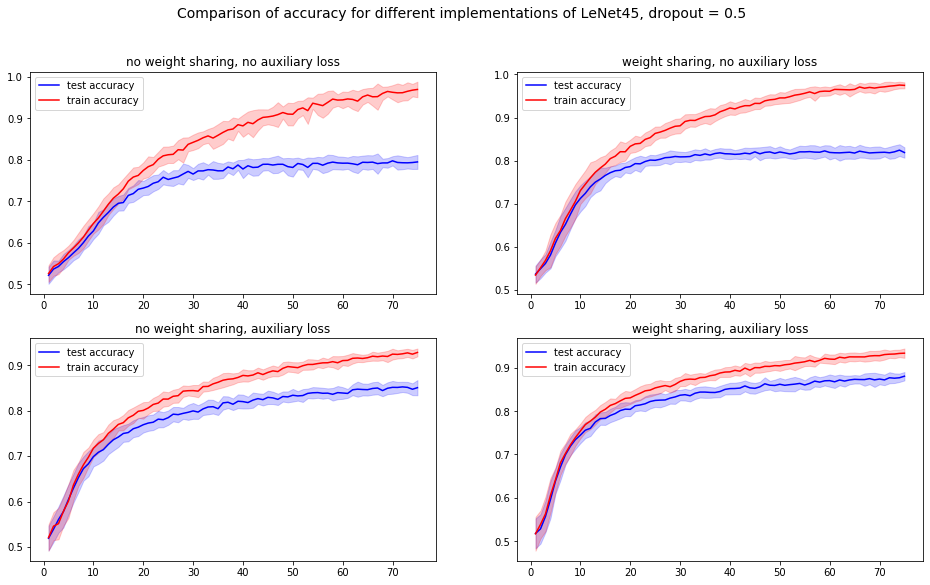

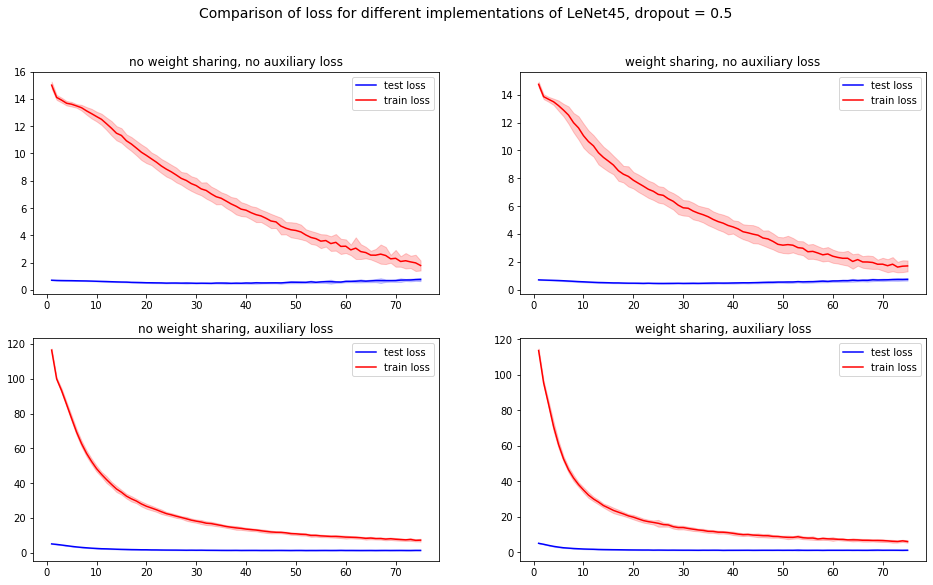

In [262]:
plot_quantities("accuracy", "results4.csv", "LeNet45, dropout = 0.5")
plot_quantities("loss", "results4.csv","LeNet45, dropout = 0.5")

In [56]:
df = pd.read_csv("results7.csv")
df = df.groupby(['epoch', 'weight sharing', 'model', 'auxiliary']).mean()
df = df.reset_index()
df = df[(df['epoch'] == 74)]


In [57]:
df

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
296,74,False,DeepFCNet(4),"(0, 1)",6599,0.81096,8.313747,0.75788,0.509890
297,74,False,DeepFCNet(4),"(1, 1)",4724,0.90872,11.378366,0.83540,1.799990
298,74,True,DeepFCNet(4),"(0, 1)",2849,0.86764,6.224500,0.79844,0.470119
299,74,True,DeepFCNet(4),"(1, 1)",974,0.92176,9.411352,0.86776,1.479441


In [47]:
df[df["model"] =="LeNet4_dropout_0.5"]

,epoch,weight sharing,model,auxiliary,Unnamed: 0,train accuracy,train loss,test accuracy,test loss
594,74,False,LeNet4_dropout_0.5,False,14099,0.98520,1.106096,0.81120,0.745228
595,74,False,LeNet4_dropout_0.5,True,12224,0.96108,3.773767,0.84096,1.487471
598,74,True,LeNet4_dropout_0.5,False,10349,0.98360,0.958559,0.83456,0.724469
599,74,True,LeNet4_dropout_0.5,True,8474,0.94824,4.956013,0.86056,1.324126


In [28]:
def plot_quantities_2(column, path, model):
    df = pd.read_csv(path)
    train = "train_"+ column
    test = "test_" + column
    
    
    if column == "accuracy":
        b = "Accuracy"
    else:
        b = "MSE loss"
    
    tdf = df.groupby('epoch')
    mean = tdf.mean()
    std = tdf.std()
    mean = mean.reset_index()
    std = std.reset_index()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))


    axes[.plot(np.arange(1, mean.shape[0]+1) , mean[test].values, 'k-', color = "blue", label =test)
    plt.fill_between(np.arange(1, mean.shape[0]+1),  mean[test].values- std[test].values,  mean[test].values+ std[test].values, color='blue', alpha=0.2)

    plt.plot(np.arange(1, mean.shape[0]+1) , mean[train].values, 'k-', color = "red" ,label= train)
    plt.fill_between(np.arange(1, mean.shape[0]+1),  mean[train].values- std[train].values,  mean[train].values+ std[train].values, color='red', alpha=0.2)
    plt.legend()
    title = ""
    plt.title("{} through different epochs for the model using {}".format(b, model))

    plt.savefig('{}_{}.png'.format(column, model))       
          



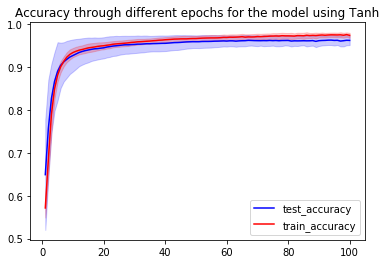

In [29]:
plot_quantities_2("accuracy", "results_tanh.csv", "Tanh")

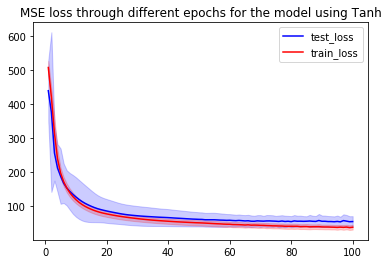

In [30]:
plot_quantities_2("loss", "results_tanh.csv", "Tanh")

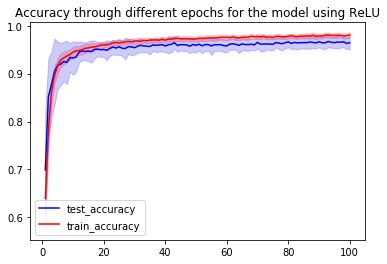

In [31]:
plot_quantities_2("accuracy", "results_relu.csv", "ReLU")

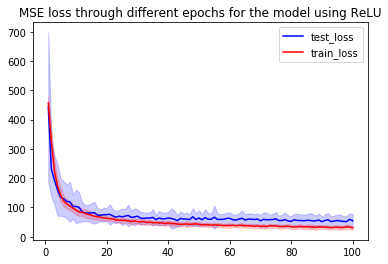

In [32]:
plot_quantities_2("loss", "results_relu.csv", "ReLU")

In [43]:
df = pd.read_csv("results_relu.csv")
df = df.groupby(['epoch']).std()
df = df.reset_index()
df = df[(df['epoch'] == 99)]


In [44]:
df

,epoch,Unnamed: 0,train_loss,test_loss,train_accuracy,test_accuracy
99,99,735.980072,6.954106,22.714758,0.005558,0.013696
